# (Students Performance Investigation)
## by (Mohamed Mohamed Soliman)

## Preliminary Wrangling

> This project explores a dataset containing Students Performances and parents education levels for approximately 1000 students.

In [191]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [192]:
df =pd.read_csv("StudentsPerformance.csv")

In [193]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [194]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [195]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### What is the structure of your dataset?

>There are 10,000 student in the dataset with 8 features (gender,race/ethnicity,parental elvel of education,launch,test prepration course,math score,reading score,writing score, and an addtional created feature overall mean score

>gender : sex of students<br>
race/ethnicity : ethnicity of students<br>
parental level of education : parents' final education<br>
lunch : having lunch before test (normal or abnormal)<br>
test preparation course : complete or not complete before test<br>

### What is/are the main feature(s) of interest in your dataset?

> I am interested in understanding the influence of the parents background, test preparation etc on students performance

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All features wil be included.

## Univariate Exploration


First we will take a look on the disturbtion of the 3 scores math,writing and reading

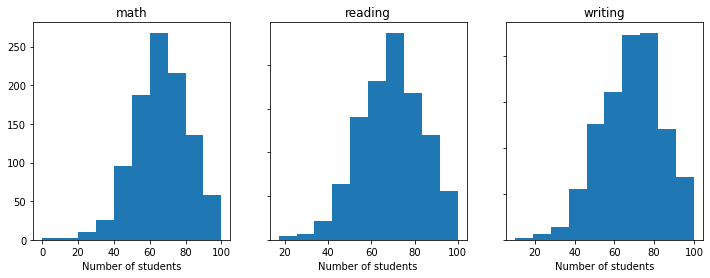

In [197]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)  
ax1.hist(data=df,x='math score');
ax1.set_title('math')
ax1.set_xlabel("grade")
ax1.set_xlabel("Number of students");
ax2.hist(data=df,x='reading score');
ax2.set_title("reading")
ax2.set_xlabel("grade")
ax2.set_xlabel("Number of students");
ax3.hist(data=df,x='writing score');
ax3.set_title("writing")
ax3.set_xlabel("grade")
ax3.set_xlabel("Number of students");
fig.set_size_inches(12,4)
for ax in fig.get_axes():
    ax.label_outer()

we can see thatthe 3 scores are a little bit sekweed to the left

We will add a new feature 'overall_score' which consists of the mean score value of the math,reading and writing scores combined

In [198]:
df['overall_score']=(df['writing score']+df['reading score']+df['math score'])/3

considering parental level of education 'Some high school' same as 'high school' 

In [199]:
df['parental level of education']=df['parental level of education'].replace({'some high school':'high school'})

let's see the the ratio in the study between males and females

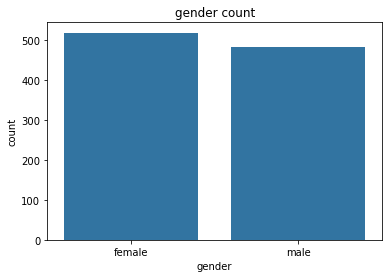

In [200]:
sns.countplot(data=df,x='gender',color = sns.color_palette()[0])
plt.title('gender count')
plt.show()

number of females is slightly greater than number of males in this study

now let's see how the parents educational levels varies

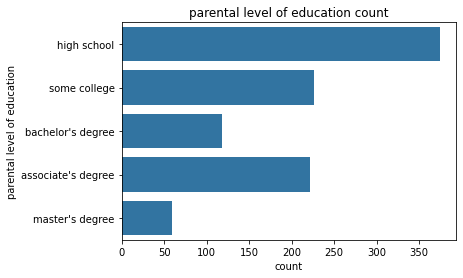

In [201]:
orderr=['high school','some college',"bachelor's degree","associate's degree","master's degree"]
sns.countplot(data=df,y='parental level of education',color= sns.color_palette()[0],order=orderr)
plt.title('parental level of education count')
plt.show()

we can see a variety of students parents educational background with the top 2 are associate's degree and some college

we will now look at the lunch observations ratios

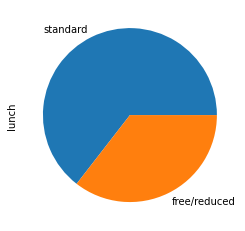

In [202]:
df['lunch'].value_counts().plot(kind='pie');

we can see that the standard lunch is much common that free/reduced lunch

let us finally see the how the overall score is distributed

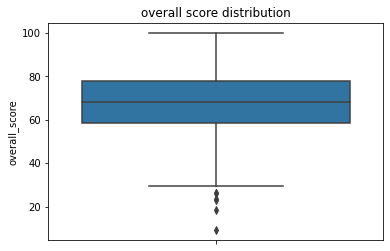

In [203]:
sns.boxplot(data=df,y='overall_score');
plt.title('overall score distribution');


The Overall scores interquartile range lies between approximately 60 and 80 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the overall score has some outliers low grades but it's normal to have outliers in grades distribuation!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No the points were clear

## Bivariate Exploration

first we will answer the question:
### Q1:  Is there a relation between student gender and his scores? 

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


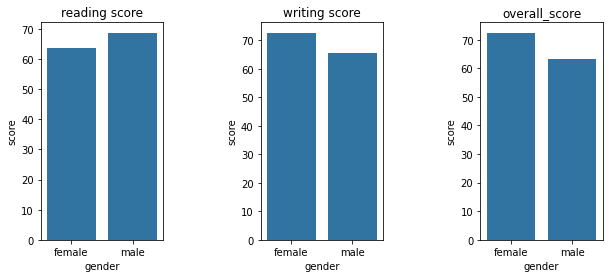

In [204]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df.groupby("gender")[list(df.columns[-4:-1])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values,color=default_color)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[idx])
    
plt.show()

### Answer:
>We can see that male has better performance on math field, but worse on reading and writing.

### Question 2: how does lunch type affects student overall score?

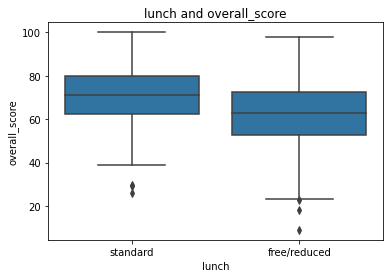

In [205]:
sns.boxplot(data=df,y='overall_score',x='lunch',color=sns.color_palette()[0])
plt.title('lunch and overall_score')
plt.show()

### Answer:
>Students who had the standard lunch had an average overall score greater than those with free/reduced lunch.
and also had a narrower grades distribuation

### Question 3: Does taking a test prepration course hepls students achieve greater scores  ?

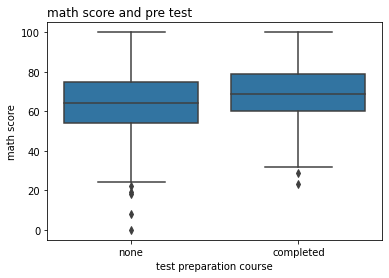

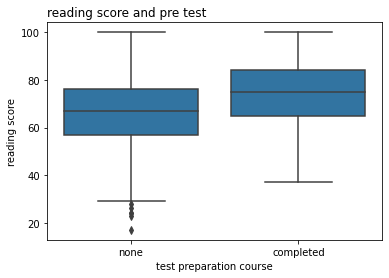

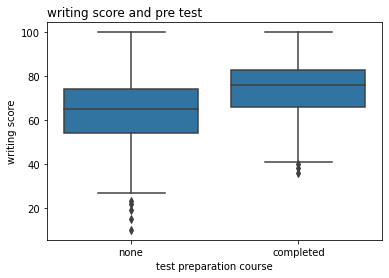

In [206]:
for item in df.columns[-4:-1]:
    sns.boxplot(x=df["test preparation course"], y=df[item],color=sns.color_palette()[0])
    plt.title(item+" and pre test", loc="left")
    plt.show()

### Answer: 
> The average scores tend to be higher with those who completed a test preparation course.<br>
Also The score distribution gets narrower if students complete the preparation course before test

### Question 4: Does Student Gender affects his total overall score ?

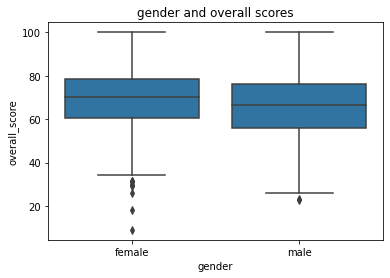

In [207]:
sns.boxplot(data=df,y='overall_score',x='gender',color=sns.color_palette()[0]);
plt.title('gender and overall scores');

### Answer:
> Females tend to have a slightly higher average overall score with a narrower distribution and higher outliers count but overall it's not big enough to claim that gender really affects students scores.

### Q5: is there a correlation between reading and writing scores ? 

Text(0.5, 1.0, 'relationship between reading and writing scores')

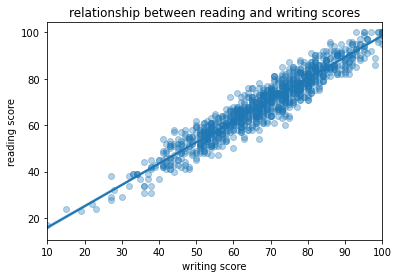

In [208]:
#sns.swarmplot(data=df,x='writing score',y='reading score')
sns.regplot(data=df,x='writing score',y='reading score',scatter_kws={'alpha':1/3});
plt.title("relationship between reading and writing scores")

### Answer:
> We can see that the reading and writing scores has a postive correlation which means that students with high reading/ writing scores tend to have a high writing/reading scores also

### Q6 : Is there a relation between math and writing scores  ? and what are the distribuation peeks?  

In [209]:
df[['writing score','math score']].describe()

,writing score,math score
count,1000.000000,1000.00000
mean,68.054000,66.08900
std,15.195657,15.16308
min,10.000000,0.00000
25%,57.750000,57.00000
50%,69.000000,66.00000
75%,79.000000,77.00000
max,100.000000,100.00000


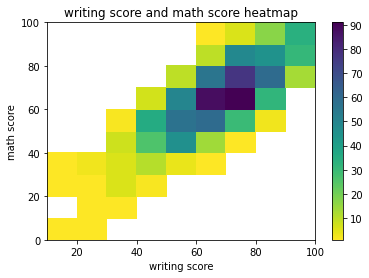

In [210]:
x_binss=np.arange(10,100+10,10)
y_bins=np.arange(0,100+10,10)
plt.hist2d(data=df,x='writing score',y='math score',cmin=.5,cmap='viridis_r',bins=[x_binss,y_bins]);
plt.colorbar();
plt.title('writing score and math score heatmap');
plt.xlabel('writing score');
plt.ylabel('math score');

### Answer:
> With the above heatmap we can see that math scores and writing scores has a postive correlation with a distrubation peeks in the darker cells usually between 60 and 80 in both axis

### Q7: Is there a relationship between student parents educational level and his  overall grades score  ? 

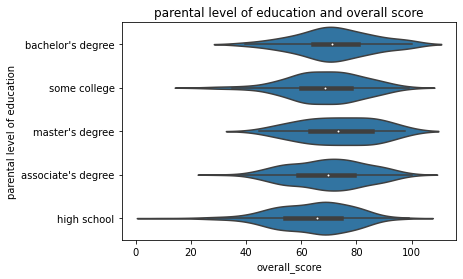

In [211]:
sns.violinplot(data=df,y='parental level of education',x='overall_score',color=sns.color_palette()[0])
plt.title('parental level of education and overall score');
plt.show()

### Answer:
> we can see that studens with parental level of education " master's degree " tend to have the highest mean overall scores. and students with parental education level of high school tend to have the lowest mean overall score

### Q8:  Which race/ethnicity has the highest average overall scores ?

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


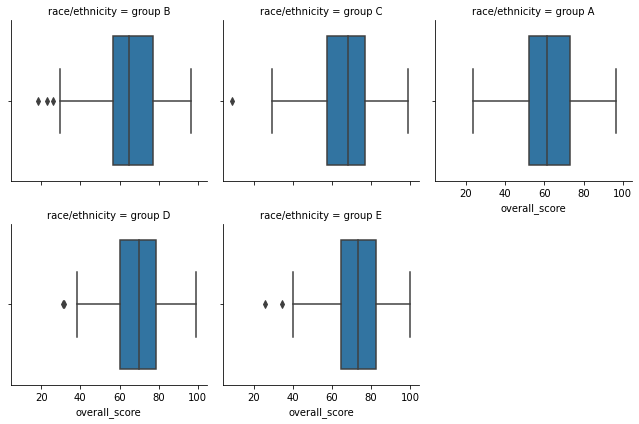

In [212]:
g=sns.FacetGrid(data=df,col='race/ethnicity',col_wrap=3,sharey=False)
g.map(sns.boxplot,'overall_score');

### Answer:
> Group E has the highest mean overall scores and the smalles distribuation area 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We saw a strong postive relationship between student test scores and completing a test prepreation course which means studetns who had complete the prepration course had an average overall scores than those who didn't.
also we saw how the parents educational level effects the overall score and that the higher the parents education level the higher the student overall scores

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes!
we saw how there is a postive correlation between the reading and writing scores and that students who has has greater math/writing scores tend to have also a greater writing/math scores.

## Multivariate Exploration


### Question 10: how the race/ethnicity tends to effect the student overall score based on his gender ?

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


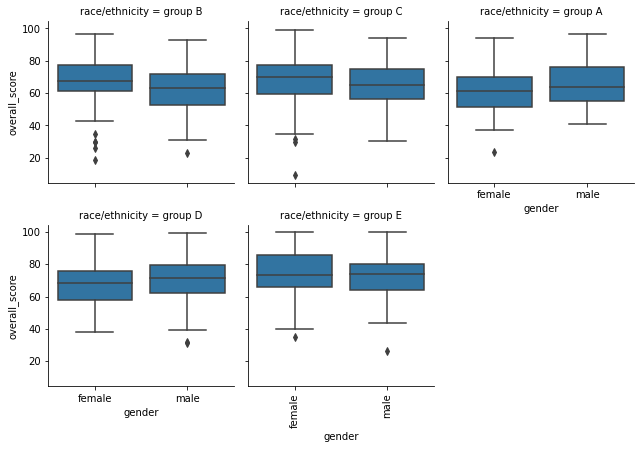

In [213]:
g=sns.FacetGrid(data=df,col='race/ethnicity',col_wrap=3)
g.map(sns.boxplot,'gender','overall_score')
plt.xticks(rotation=90);

### Answer:
>Males Tend to have a higher mean overall score in group A and D but Females scores tend to be higher is groups A,B and E

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We Saw that gender does not really affect overallscore based on race we saw that in some groups female tend to have higher mean overall score and in others male has the higher mean score value.

### Were there any interesting or surprising interactions between features?

> Not surprising but rather confirimng the previous investigations.

In [ ]:
!jupyter nbconvert exploration_temp